In [ ]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Características das variáveis do dataset

df = pd.read_excel('./tempodist.xls')

In [ ]:
#Estatísticas univariadas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tempo (Y)             10 non-null     float64
 1   Distância (X)         10 non-null     float64
 2   Y estimado (Ychapéu)  11 non-null     object 
 3   erro                  11 non-null     int64  
 4   erro²                 11 non-null     int64  
 5   Unnamed: 5            0 non-null      float64
 6   Unnamed: 6            0 non-null      float64
 7   alfa                  1 non-null      object 
dtypes: float64(4), int64(2), object(2)
memory usage: 832.0+ bytes


In [ ]:
#Regressão linear que melhor se adequa às obeservações: função 'sns.regplot'

df.describe()

,Tempo (Y),Distância (X),erro,erro²,Unnamed: 5,Unnamed: 6
count,10.00000,10.000000,11.000000,11.000000,0.0,0.0
mean,30.00000,17.000000,54.545455,2000.000000,NaN,NaN
std,14.90712,9.510228,82.627312,3131.173901,NaN,NaN
min,10.00000,5.000000,10.000000,100.000000,NaN,NaN
25%,20.00000,8.750000,20.000000,400.000000,NaN,NaN
50%,27.50000,17.500000,30.000000,900.000000,NaN,NaN
75%,38.75000,23.750000,45.000000,2050.000000,NaN,NaN
max,55.00000,32.000000,300.000000,11000.000000,NaN,NaN


In [ ]:
#Redefinição dos nomes das colunas
df.rename(columns={'Tempo (Y)': 'tempo', 'distnacia': 'distancia'}, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

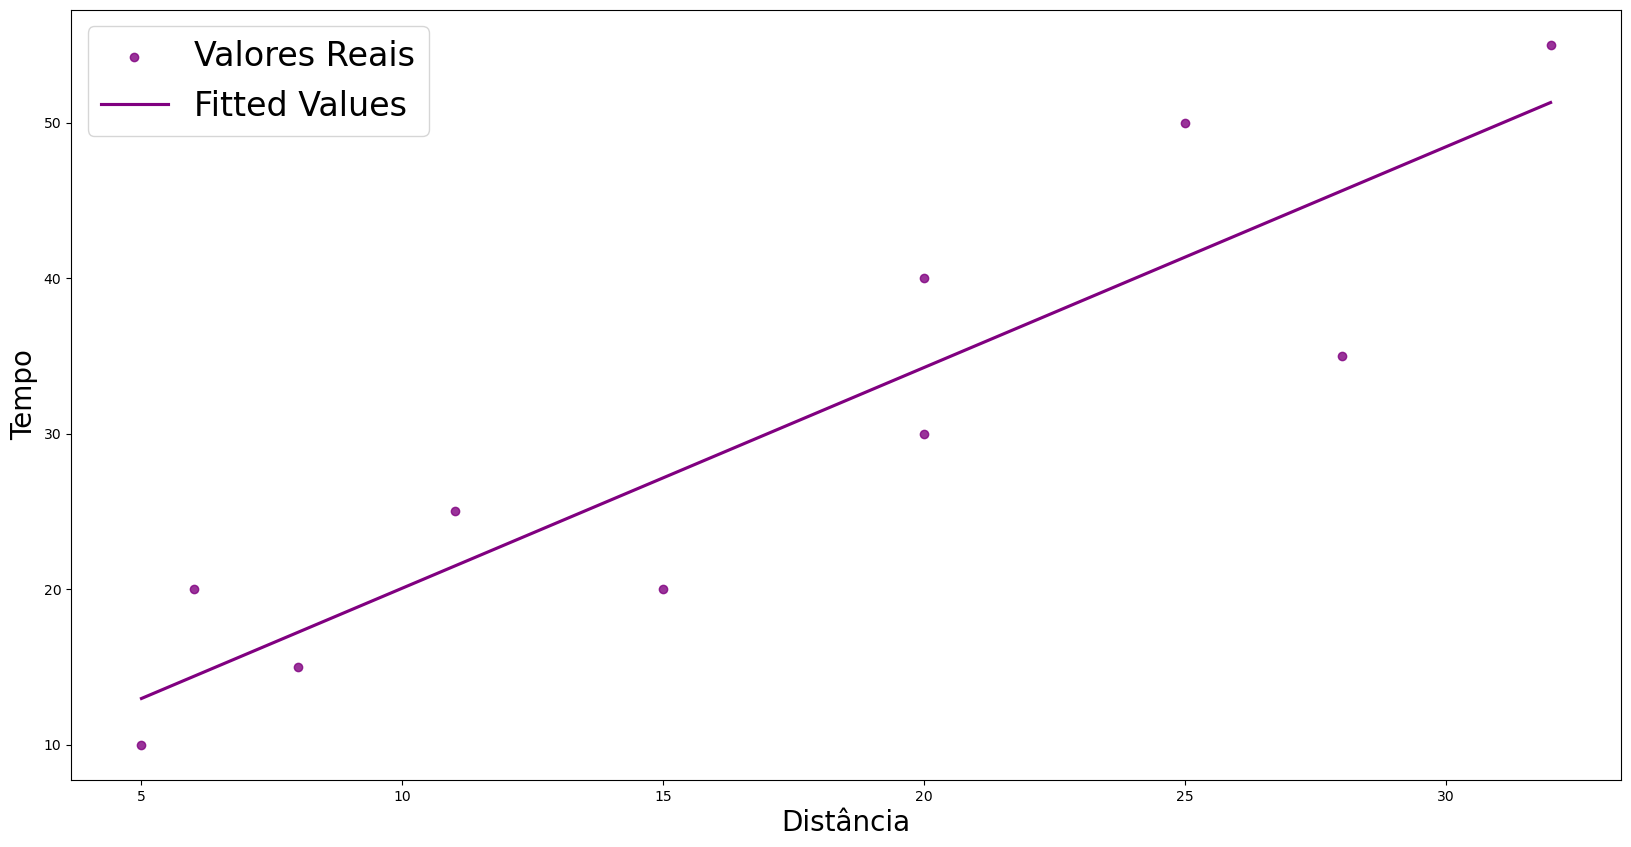

In [ ]:
# In[ ]: Gráfico de dispersão

plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='tempo', ci=False, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [ ]:
# In[ ]: Estimação do modelo de regressão linear simples

#Estimação do modelo
modelo = sm.OLS.from_formula("tempo ~ distancia", df).fit()

In [ ]:
#Observação dos parâmetros resultantes da estimação
modelo.summary()

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           0.000314
Time:                        21:14:41   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# In[ ]: Salvando fitted values (variável yhat)
# e residuals (variável erro) no dataset
df['yhat'] = modelo.fittedvalues
df['erro'] = modelo.resid
df

,tempo,distancia,Y estimado (Ychapéu),erro,erro²,Unnamed: 5,Unnamed: 6,alfa,yhat
0,15.0,8.0,0,-2.229730,225,NaN,NaN,beta,17.229730
1,20.0,6.0,0,5.608108,400,NaN,NaN,NaN,14.391892
2,20.0,15.0,0,-7.162162,400,NaN,NaN,NaN,27.162162
3,40.0,20.0,0,5.743243,1600,NaN,NaN,NaN,34.256757
4,50.0,25.0,0,8.648649,2500,NaN,NaN,NaN,41.351351
5,25.0,11.0,0,3.513514,625,NaN,NaN,NaN,21.486486
6,10.0,5.0,0,-2.972973,100,NaN,NaN,NaN,12.972973
7,55.0,32.0,0,3.716216,3025,NaN,NaN,NaN,51.283784
8,35.0,28.0,0,-10.608108,1225,NaN,NaN,NaN,45.608108
9,30.0,20.0,0,-4.256757,900,NaN,NaN,NaN,34.256757


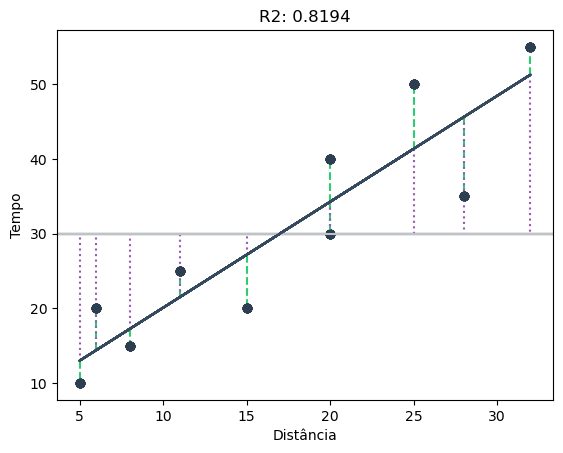

In [ ]:
# In[ ]: Gráfico didático para visualizar o conceito de R²
y = df['tempo']
yhat = df['yhat']
x = df['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Distância")
    plt.ylabel("Tempo")
plt.show()


In [ ]:
# In[ ]: Cálculo manual do R²
R2 = ((df['yhat']-
       df['tempo'].mean())**2).sum()/(((df['yhat']-
                                        df['tempo'].mean())**2).sum()+
                                        (df['erro']**2).sum())

In [ ]:
round(R2,4)


0.8194

In [ ]:
# In[ ]: Coeficiente de ajuste (R²) é a correlação ao quadrado

df[['tempo','distancia']].corr()


,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [ ]:
(df[['tempo','distancia']].corr())**2


,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [ ]:
# In[ ]: Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)

#Estimação do modelo com yhat como variável dependente,
#resultará em uma modelo com R² igual a 100%
modelo_auxiliar = sm.OLS.from_formula("yhat ~ distancia", df).fit()


In [ ]:
modelo_auxiliar.summary()


C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.669e+31
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.36e-124
Time:                        21:21:26   Log-Likelihood:                 314.52
No. Observations:                  10   AIC:                            -625.0
Df Residuals:                       8   BIC:                            -624.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4e-15   1.47e+15      0.000       5.878       5.878
distancia      1.4189   2.08e-16   6.83e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                        9.461   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                1.523
Skew:                           0.058   Prob(JB):                        0.467
Kurtosis:                       1.092   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

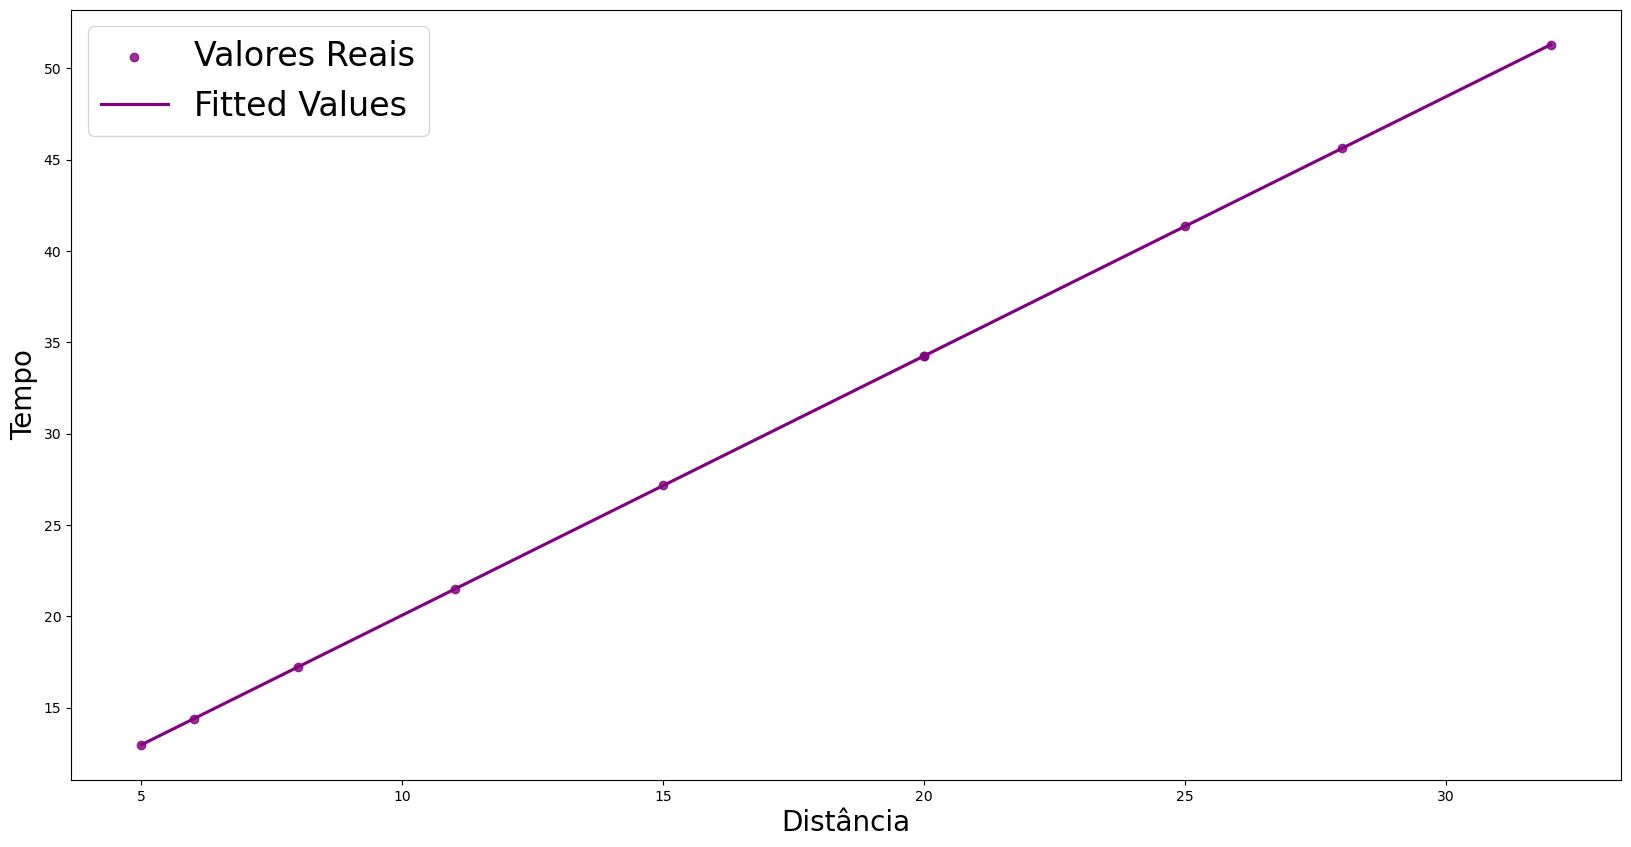

In [ ]:
# In[ ]:Gráfico mostrando o perfect fit
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distancia', y='yhat', ci=False, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show